In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats

In [2]:
# Read in file
cucco_file = "./cucco_madness.csv"

In [3]:
cucco_data = pd.read_csv(cucco_file)
cucco_df = pd.DataFrame(cucco_data)
cucco_df.columns = ["Seconds"]

In [4]:
cucco_df.describe()

,Seconds
count,364.000000
mean,117.602555
std,79.521270
min,2.610000
25%,55.512500
50%,110.305000
75%,159.550000
max,386.000000


   Phase  Attempts  Success Rate
0    1.0     161.0     55.769231
1    2.0     153.0     24.630542
2    3.0      34.0     32.000000
3    4.0      16.0      0.000000


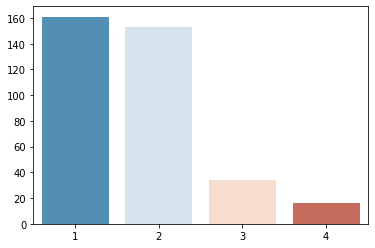

In [5]:
cucco_df["phase"] = ((cucco_df["Seconds"] / 100) + 1).astype(int)
phase, attempts = np.unique(cucco_df["phase"], return_counts=True)
total_attempts = len(cucco_df.index)
success_df = pd.DataFrame(columns=["Phase", "Attempts", "Success Rate"])
for index, attempt in enumerate(attempts):
    success_rate = total_attempts
    for i in range(index-1, -1, -1):
        success_rate -= attempts[i];
    success_rate = 100 * (success_rate - attempt) / success_rate
    next_phase = {"Phase": (index+1), "Attempts": attempt, "Success Rate": success_rate}
    success_df = success_df.append(next_phase, ignore_index=True)
print(success_df)
sns.barplot(phase, attempts, palette="RdBu_r")

Slope: 0.0635938246062779
Intercept: 106.06027577901551

Attempts Left Until Next Phase: 4622
Attempts Left Total: 14056

Days Left Until Next Phase: 184
Days Left Total: 562


<function matplotlib.pyplot.show(*args, **kw)>

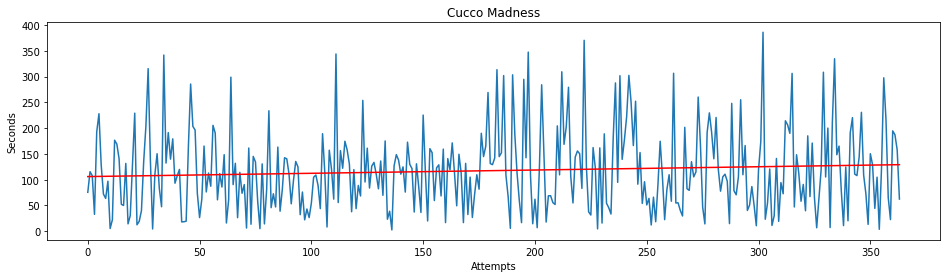

In [6]:
plt.figure(figsize=(16, 4))
plot = sns.lineplot(x=cucco_df.index, y=cucco_df["Seconds"], sort=False)

slope, intercept, r_value, p_value, std_err = stats.linregress(cucco_df.index.values,cucco_df["Seconds"].tolist())
x_vals = cucco_df.index.values
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color="red")

print("Slope: {}".format(slope))
print("Intercept: {}\n".format(intercept))
next_phase = int((400 - intercept)/(slope))
total_left = int((999.99 - intercept)/(slope))
print("Attempts Left Until Next Phase: {}".format(next_phase))
print("Attempts Left Total: {}\n".format(total_left))
print("Days Left Until Next Phase: {}".format(int(next_phase / 25)))
print("Days Left Total: {}".format(int(total_left / 25)))

#plt.ylim(0, 999.99)
plt.xlabel("Attempts")
y_label = "Seconds"
plt.ylabel(y_label)
plt.title("Cucco Madness")
plt.show

In [7]:
def moving_average(seconds):
    mean = [0] * len(seconds)
    for index, time in enumerate(seconds):
        mean[index] = sum(seconds[range(index + 1)]) / (index + 1)
    return mean

seconds = np.array(cucco_df["Seconds"].values)
mean = moving_average(seconds)
cucco_df["Mean"] = mean
cucco_df.describe()

,Seconds,phase,Mean
count,364.000000,364.000000,364.000000
mean,117.602555,1.739011,111.579143
std,79.521270,0.803241,5.803925
min,2.610000,1.000000,75.520000
25%,55.512500,1.000000,107.301154
50%,110.305000,2.000000,113.216349
75%,159.550000,2.000000,116.308832
max,386.000000,4.000000,125.868571


Slope: 0.0359667089115779
Intercept: 105.05118499977331



<function matplotlib.pyplot.show(*args, **kw)>

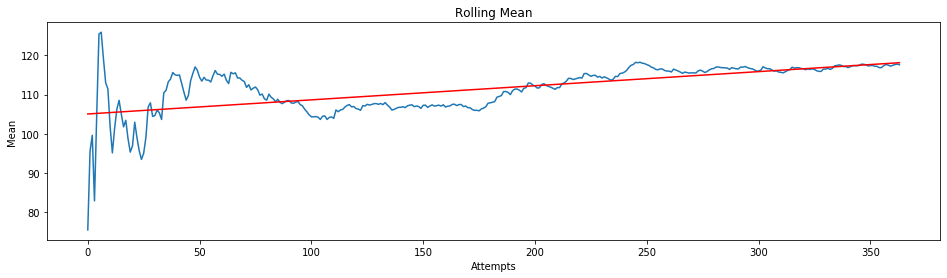

In [8]:
plt.figure(figsize=(16, 4))
plot = sns.lineplot(x=cucco_df.index, y=cucco_df["Mean"], sort=False)

slope, intercept, r_value, p_value, std_err = stats.linregress(cucco_df.index.values,cucco_df["Mean"].tolist())
x_vals = cucco_df.index.values
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color="red")

print("Slope: {}".format(slope))
print("Intercept: {}\n".format(intercept))

#plt.ylim(0, 999.99)
plt.xlabel("Attempts")
y_label = "Mean"
plt.ylabel(y_label)
plt.title("Rolling Mean")
plt.show